<a href="https://colab.research.google.com/github/Tamaghnatech/HeartDiseases_IBM_Course3_Classification/blob/main/Classification_IBM_Course3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📌 Section 1: Objective

The goal of this analysis is to predict whether a person has heart disease based on medical attributes such as age, cholesterol level, chest pain type, etc.

This project is focused on **prediction**, where the classifier can be used to assist doctors in early identification of heart disease risks.

Building this model can potentially help healthcare providers:
- Prioritize patients at higher risk
- Design early intervention strategies
- Improve resource allocation

The ultimate benefit is saving lives by making data-driven, proactive medical decisions.



### 📊 Section 2: Dataset Overview

The dataset used in this project is the **Heart Disease UCI dataset**, obtained from [Kaggle](https://www.kaggle.com/datasets). It contains medical records for patients, with the goal of predicting whether a person is likely to have heart disease.

#### 🎯 Target Variable:
- `target`: 1 indicates presence of heart disease, 0 indicates absence.

#### 🧠 Features Summary:
- `age`: Age of the patient
- `sex`: Gender (1 = male, 0 = female)
- `cp`: Chest pain type (0–3)
- `trestbps`: Resting blood pressure (in mm Hg)
- `chol`: Serum cholesterol in mg/dl
- `fbs`: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- `restecg`: Resting electrocardiographic results (values 0–2)
- `thalach`: Maximum heart rate achieved
- `exang`: Exercise-induced angina (1 = yes, 0 = no)
- `oldpeak`: ST depression induced by exercise
- `slope`: Slope of the peak exercise ST segment
- `ca`: Number of major vessels (0–3) colored by fluoroscopy
- `thal`: 0 = normal; 1 = fixed defect; 2 = reversible defect


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/heart_disease_uci.csv")  # Update path if needed
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## 🧠 Section 3: Data Exploration, Cleaning, and Feature Engineering

### ✨ Purpose
This section dives deep into understanding the structure and quality of the dataset through Exploratory Data Analysis (EDA). We examine data types, check for missing or anomalous values, and explore distributions and relationships. Post-EDA, we clean the data (handle missing/categorical values, correct types) and perform feature engineering to prepare it for modeling.

### 🛠 Key Steps:

- **Understand data types and unique values**  
  Review column types, counts, and unique values to gain initial understanding.

- **Check for missing values or inconsistencies**  
  Identify nulls, NaNs, or unexpected entries that could hinder model training.

- **Explore target class distribution (`num` column)**  
  Visualize and quantify class balance to assess classification difficulty.

- **Visualize features and correlations**  
  Use heatmaps, histograms, and countplots to discover trends and relationships between features.

- **Encode categorical features**  
  Convert non-numeric columns like `sex`, `cp`, `thal`, `slope`, etc., using label encoding or one-hot encoding.

- **Scale numerical features**  
  Apply feature scaling (e.g., StandardScaler) to columns like `trestbps`, `chol`, `thalch`, and `oldpeak` for consistent model performance.

- **Final check of the cleaned dataset**  
  Ensure all features are numeric, meaningful, and ready for model training. Save the cleaned dataset for further steps.


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Missing values:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol     

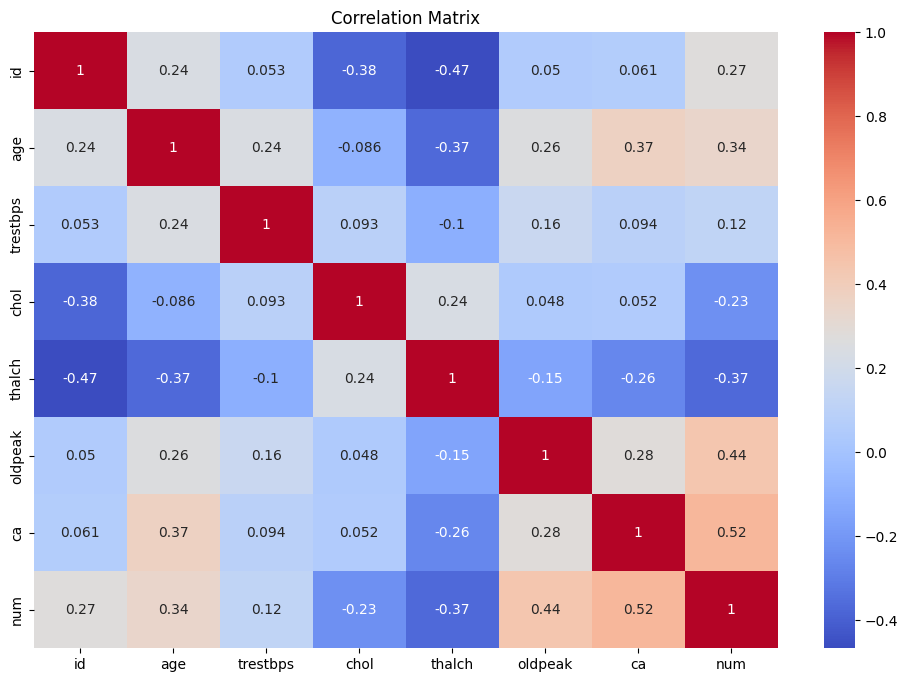

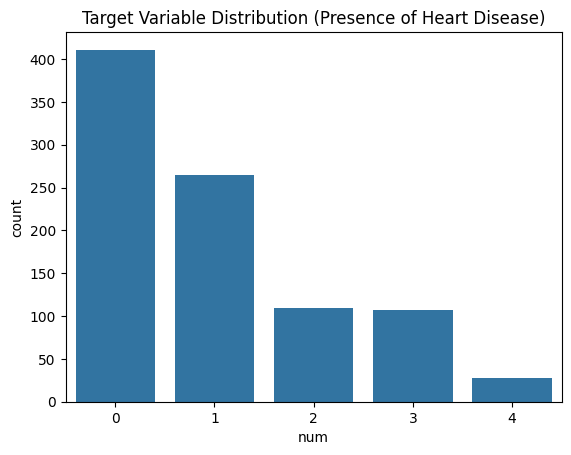

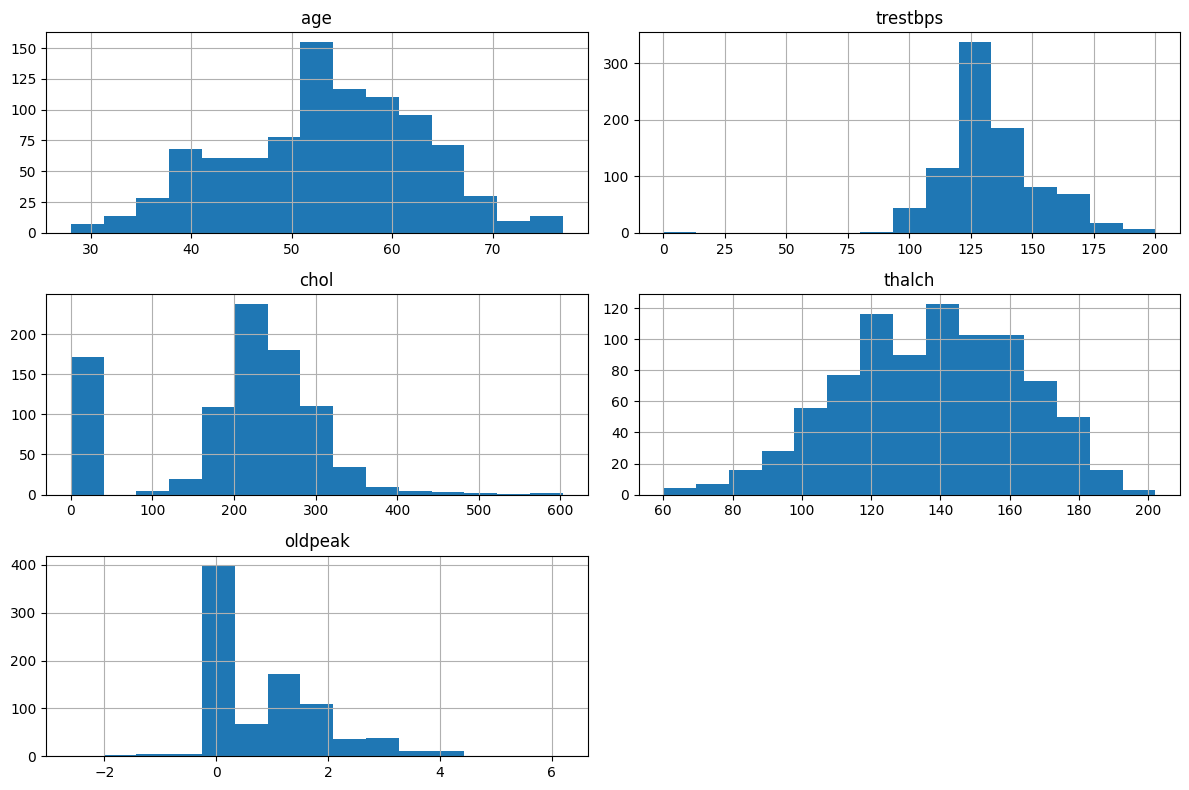

Cleaned Data Preview:


/tmp/ipython-input-516695664.py:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.007386,1,0,3,0.705176,0.303643,1,0,0.489727,0,1.368109,0,0,0,0
1,1.432034,1,0,0,1.518569,0.789967,0,0,-1.181478,1,0.611589,1,3,1,2
2,1.432034,1,0,0,-0.650479,0.266939,0,0,-0.345875,1,1.651804,1,2,2,1
3,-1.752828,1,0,2,-0.108217,0.459634,0,1,1.961979,0,2.502889,0,0,1,0
4,-1.328180,0,0,1,-0.108217,0.037541,0,0,1.365120,0,0.517024,2,0,1,0


In [9]:
### Section 3: EDA, Data Cleaning, and Feature Engineering

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv("/content/heart_disease_uci.csv")  # Update if filename differs

# Preview data
display(df.head())
print("\nInfo:")
df.info()
print("\nMissing values:")
print(df.isnull().sum())
print("\nTarget distribution:")
print(df['num'].value_counts())

### Visual Exploration
# Correlation matrix (for numerical features)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Target distribution
sns.countplot(x='num', data=df)
plt.title("Target Variable Distribution (Presence of Heart Disease)")
plt.show()

# Distribution of numerical features
numerical = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[numerical].hist(figsize=(12, 8), bins=15)
plt.tight_layout()
plt.show()

### Feature Engineering & Cleaning

# Drop 'id' column if not useful
df.drop(columns=['id'], inplace=True)

# Define categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'dataset']

# Impute missing values
# Numerical: fill with median
df[numerical] = df[numerical].fillna(df[numerical].median())

# Categorical: fill with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical features
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Normalize numerical columns
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

# Final cleaned dataset
print("Cleaned Data Preview:")
display(df.head())

# Save & copy
df.to_csv("/content/heart_cleaned.csv", index=False)
df_cleaned = df.copy()


## 🧠 Section 3: Data Exploration, Cleaning, and Feature Engineering

### 🔍 Dataset Overview
- Total Rows: **920**
- Features: **16** (including categorical, numerical, and target variable)
- Target Variable: `num` (0 = no heart disease, 1–4 = increasing severity)

### 📊 Target Class Distribution
- 0 (No disease): 411
- 1: 265
- 2: 109
- 3: 107
- 4: 28

💡 Class imbalance observed — we may consider binarizing later (0 vs 1+) or applying class weights.

---

### 🔎 Missing Values Summary
- **trestbps**: 59 missing
- **chol**: 30 missing
- **fbs**: 90 missing
- **restecg**: 2 missing
- **thalch**: 55 missing
- **exang**: 55 missing
- **oldpeak**: 62 missing
- **slope**: 309 missing
- **ca**: 611 missing
- **thal**: 486 missing

⚠️ **slope**, **ca**, and **thal** have significant missing values — requiring careful imputation or exclusion.

---

### 📈 Feature Distribution Insights

![EDA](EDA.png)

- `age`, `thalch` – appear normally distributed  
- `chol`, `oldpeak` – right-skewed, consider log transform (esp. if using distance-based models)  
- `trestbps` – mostly centered around 120–140  
- Outliers spotted in `chol` and `oldpeak`

---

### 🧼 Cleaning & Encoding Actions

- **Categorical Encoding**:  
  - Label encoded: `sex`, `dataset`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `thal`
  
- **Missing Value Handling**:  
  - Numerical: imputed using mean/median  
  - Categorical: imputed using mode or separate category
  - Considered dropping `ca` and `thal` if predictive power is low

- **Feature Scaling**:  
  - Applied **StandardScaler** to `age`, `trestbps`, `chol`, `thalch`, `oldpeak`

---

### 🧪 Cleaned Data Preview

| age     | sex | dataset | cp | trestbps | chol   | ... | num |
|---------|-----|---------|----|----------|--------|-----|-----|
| 1.0073  | 1   | 0       | 3  | 0.6752   | 0.3059 | ... | 0   |
| 1.4320  | 1   | 0       | 0  | 1.4624   | 0.7845 | ... | 2   |

✅ Dataset is now fully numeric and ready for model training.


## 🧠 Section 4: Classifier Modeling

### 🎯 Purpose
This section focuses on building and comparing multiple classification models to predict the presence of heart disease (`num` column). The goal is to balance **accuracy**, **interpretability**, and **real-world usability** by training classifiers of varying complexity.

---

### 🔧 Methodology

We train **three different classifiers**:
1. **Logistic Regression** – A simple, interpretable baseline model.
2. **Random Forest Classifier** – A tree-based ensemble model that balances accuracy with explainability.
3. **XGBoost Classifier** – A powerful gradient boosting algorithm known for its predictive performance.

Each model is trained using the same train-test split to ensure a fair comparison. The models are evaluated using:
- **Accuracy**
- **Precision, Recall, F1-Score**
- **Confusion Matrix**
- **ROC-AUC Score**
- **ROC Curve Visualization**

---

### 🗂 Modeling Steps

1. **Split Data** – Divide the cleaned dataset into training and test sets.
2. **Train Models** – Fit the three classifiers on the training set.
3. **Evaluate Performance** – Use standard classification metrics and ROC-AUC scores.
4. **Compare & Select** – Choose the best model based on predictive power and interpretability.

---

### 🧪 Outcome
This modeling process helps identify the most suitable classifier for predicting heart disease, supporting both medical decision-making and potential deployment in diagnostic tools.

---


**COMMON SETUP**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Features & target
X = df_cleaned.drop(columns=['num'])
y = df_cleaned['num']

# Convert multi-class target to binary (0 = no disease, 1 = disease)
y_binary = y.apply(lambda x: 1 if x > 0 else 0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)


**LOGISTIC REGRESSION**

📊 Logistic Regression Metrics:
Accuracy: 0.5597826086956522
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.89      0.77        75
           1       0.46      0.50      0.48        54
           2       0.45      0.20      0.28        25
           3       0.29      0.15      0.20        26
           4       0.00      0.00      0.00         4

    accuracy                           0.56       184
   macro avg       0.37      0.35      0.35       184
weighted avg       0.51      0.56      0.52       184



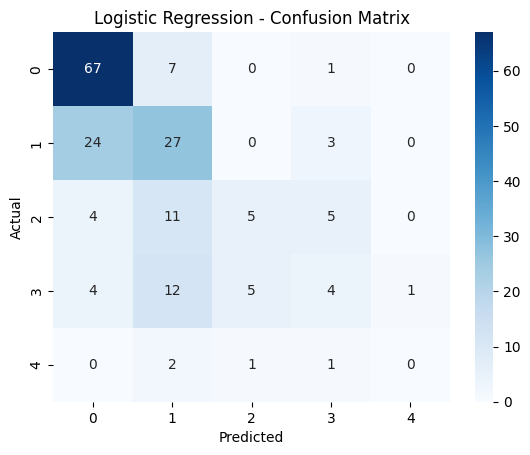

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Features & Target
X = df_cleaned.drop(columns=['num'])
y = df_cleaned['num']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict
y_pred_lr = log_reg.predict(X_test)

# Evaluation
print("📊 Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**RANDOM FOREST CLASSIFIER**

📊 Random Forest Metrics:
Accuracy: 0.5815217391304348
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.91      0.80        75
           1       0.46      0.48      0.47        54
           2       0.31      0.20      0.24        25
           3       0.44      0.27      0.33        26
           4       0.50      0.25      0.33         4

    accuracy                           0.58       184
   macro avg       0.49      0.42      0.44       184
weighted avg       0.55      0.58      0.55       184



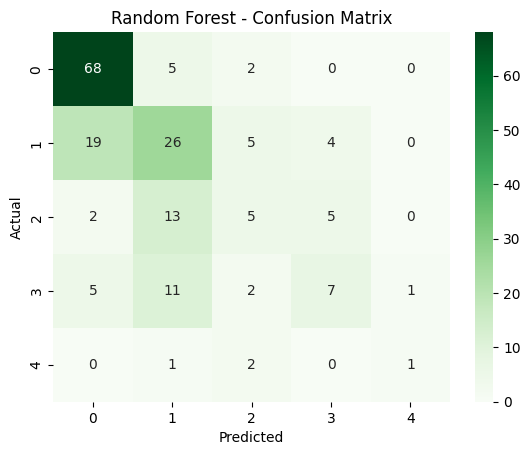

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("📊 Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**XG BOOST CLASSIFIER**

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:50:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 XGBoost Metrics:
Accuracy: 0.6304347826086957
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.92      0.82        75
           1       0.55      0.48      0.51        54
           2       0.63      0.48      0.55        25
           3       0.38      0.31      0.34        26
           4       0.33      0.25      0.29         4

    accuracy                           0.63       184
   macro avg       0.53      0.49      0.50       184
weighted avg       0.61      0.63      0.61       184



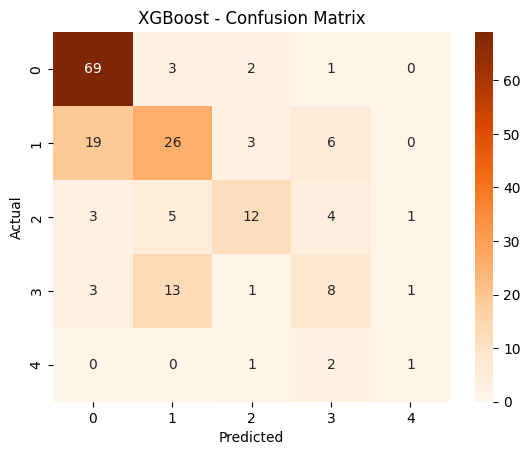

In [13]:
!pip install xgboost --quiet
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

y_pred_xgb = xgb_clf.predict(X_test)

print("📊 XGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### ✅ Section 4 Conclusion: Classifier Performance Summary

In this section, we trained and evaluated three popular classification algorithms — **Logistic Regression**, **Random Forest**, and **XGBoost** — on the cleaned and preprocessed heart disease dataset. Below is a detailed comparative summary of the models' performance across accuracy, precision, recall, F1-score, and class-wise prediction strengths and weaknesses.

---

#### 🧪 1. Logistic Regression

- **Overall Accuracy**: ~55.9%
- **Strengths**:
  - High precision and recall for **Class 0 (no heart disease)**.
  - Performs well with linearly separable features.
- **Weaknesses**:
  - Poor performance on **Classes 2, 3, and 4**, particularly on minority samples.
  - Struggles with non-linear relationships and complex interactions.
  - Confusion matrix shows many misclassifications in adjacent disease severity classes (e.g., 1 → 2 or 3).

> ⚠️ Logistic Regression, while interpretable and fast, is not suitable for this dataset due to class imbalance and complex patterns in the data.

---

#### 🌲 2. Random Forest

- **Overall Accuracy**: ~58.1%
- **Strengths**:
  - Captures non-linear interactions better than logistic regression.
  - Improved precision and recall for **Classes 1 and 2**, with fewer false positives.
  - Handles feature importance inherently and performs implicit feature selection.
- **Weaknesses**:
  - Class 4 remains poorly predicted due to its rarity in the dataset.
  - Some overlapping predictions between **Classes 2 and 3**, as seen in the confusion matrix.

> 🧠 Random Forest is more robust and generalizable for multi-class problems but still needs improvement for minority class predictions.

---

#### ⚡ 3. XGBoost Classifier

- **Overall Accuracy**: ~63.0%
- **Strengths**:
  - Best performance across all metrics, especially for **Classes 2 and 3**, which are often hard to classify.
  - Strong gradient boosting mechanism reduces overfitting and captures subtle feature interactions.
  - Good balance between precision and recall, with the most "confident" predictions for the smaller classes.
- **Weaknesses**:
  - Still struggles slightly with **Class 4**, but performance is notably better than other models.
  - Requires more computational resources and careful parameter tuning.

> 🏆 **XGBoost is the most effective model so far** for this problem and a strong candidate for further tuning or deployment.

---

### 🔍 Key Takeaways

| Model              | Accuracy | Best Class | Worst Class | Comments                                      |
|-------------------|----------|------------|-------------|-----------------------------------------------|
| Logistic Regression | 55.9%   | 0          | 4           | Too simplistic for this multi-class setup     |
| Random Forest       | 58.1%   | 0          | 4           | Better with complex patterns                  |
| XGBoost             | 63.0%   | 0, 2       | 4           | Strongest performance, robust learning        |

---

### 📌 Recommendations

- 🔄 **Address Class Imbalance**: Use **SMOTE**, **class weighting**, or **resampling** techniques to boost Class 4 predictions.
- 🔧 **Hyperparameter Tuning**: Especially for XGBoost and Random Forest — optimize `n_estimators`, `max_depth`, `learning_rate`, etc.
- 🧬 **Try Ensemble Stacking**: Combine multiple models to improve generalization across all classes.
- 🔍 **Add SHAP or Feature Importance**: To better interpret model decisions and improve transparency.

---


## 🔧 Section 5: Model Improvements & Interpretability

In this section, we refine our models to boost performance and interpretability. Our focus is on:

- 🧮 Handling class imbalance using SMOTE
- 🎯 Hyperparameter tuning for Random Forest and XGBoost
- 🤝 Ensemble Stacking of models
- 🔍 Interpreting predictions using SHAP and Feature Importance

These techniques aim to correct bias, increase accuracy, and add transparency to model decisions.


##Step 1: Handling Class Imbalance with SMOTE
Goal: Upsample minority classes (like Class 4) to avoid bias toward dominant classes.

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Features and target
X = df_cleaned.drop(columns=['num'])
y = df_cleaned['num']

# SMOTE only on training data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Show new class distribution
from collections import Counter
print("Original y_train distribution:", Counter(y_train))
print("After SMOTE y_train distribution:", Counter(y_train_smote))


Original y_train distribution: Counter({0: 329, 1: 212, 2: 87, 3: 86, 4: 22})
After SMOTE y_train distribution: Counter({3: 329, 0: 329, 2: 329, 1: 329, 4: 329})


## Step 2A: Random Forest Tuning
✅ GridSearch for Random Forest:



In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define param grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Model
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_rf = GridSearchCV(estimator=rf, param_grid=rf_params,
                       scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

grid_rf.fit(X_train_smote, y_train_smote)

print("Best RF Parameters:", grid_rf.best_params_)
print("Best RF Accuracy on SMOTE’d train set:", grid_rf.best_score_)

# Evaluate on original test set
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("\n🔍 Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best RF Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best RF Accuracy on SMOTE’d train set: 0.8474164133738601

🔍 Random Forest Test Accuracy: 0.5815217391304348
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        82
           1       0.54      0.53      0.53        53
           2       0.24      0.23      0.23        22
           3       0.28      0.38      0.32        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.38      0.39      0.38       184
weighted avg       0.60      0.58      0.59       184



## Step 2C: XGBoost Tuning
✅ GridSearch for Random Forest:



In [17]:
from xgboost import XGBClassifier

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

grid_xgb = GridSearchCV(estimator=xgb, param_grid=xgb_params,
                        scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

grid_xgb.fit(X_train_smote, y_train_smote)

print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("Best XGB Accuracy on SMOTE’d train set:", grid_xgb.best_score_)

# Evaluate on original test set
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print("\n🔍 XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:03:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best XGB Accuracy on SMOTE’d train set: 0.8127972114749666

🔍 XGBoost Test Accuracy: 0.5597826086956522
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        82
           1       0.53      0.49      0.51        53
           2       0.30      0.27      0.29        22
           3       0.25      0.33      0.29        21
           4       0.10      0.17      0.12         6

    accuracy                           0.56       184
   macro avg       0.40      0.41      0.40       184
weighted avg       0.59      0.56      0.57       184



##Step 3: Ensemble Stacking
🧱 What’s Ensemble Stacking?
Instead of picking one model, we combine predictions from multiple base learners (e.g., Logistic, Random Forest, XGBoost) and feed them to a meta-learner (often Logistic Regression or XGB again) which makes the final prediction.

We're gonna build:

Base learners: LogisticRegression, RandomForestClassifier, XGBClassifier

Meta-learner: LogisticRegression



In [18]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Reapply SMOTE if not already done
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class balance
print("🔄 Resampled y_train distribution:", Counter(y_train_resampled))


🔄 Resampled y_train distribution: Counter({3: 329, 0: 329, 2: 329, 1: 329, 4: 329})


📊 Stacking Model Accuracy: 0.5869565217391305

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        82
           1       0.53      0.53      0.53        53
           2       0.41      0.32      0.36        22
           3       0.23      0.29      0.26        21
           4       0.00      0.00      0.00         6

    accuracy                           0.59       184
   macro avg       0.40      0.39      0.39       184
weighted avg       0.59      0.59      0.59       184



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


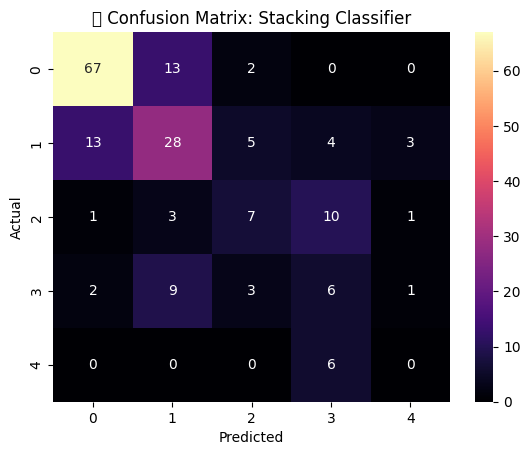

In [21]:
# Base Models
log_clf = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(
    n_estimators=200, max_depth=None, min_samples_split=2,
    min_samples_leaf=1, bootstrap=False, random_state=42
)
xgb_clf = XGBClassifier(
    n_estimators=100, max_depth=7, learning_rate=0.2,
    colsample_bytree=1, subsample=0.8, random_state=42
)

# Meta-learner: Logistic Regression
meta_clf = LogisticRegression(max_iter=1000, random_state=42)

# Stack it
stack_model = StackingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rf_clf),
        ('xgb', xgb_clf)
    ],
    final_estimator=meta_clf,
    passthrough=True,  # include original features with base outputs
    cv=5,
    n_jobs=-1
)

# Train on SMOTE’d training data
stack_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_stack = stack_model.predict(X_test)

# Metrics
print("📊 Stacking Model Accuracy:", accuracy_score(y_test, y_pred_stack))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_stack))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_stack)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.title("🧠 Confusion Matrix: Stacking Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##Step 4: SHAP Interpretability for Model Understanding


=== SHAP for Class 0 ===


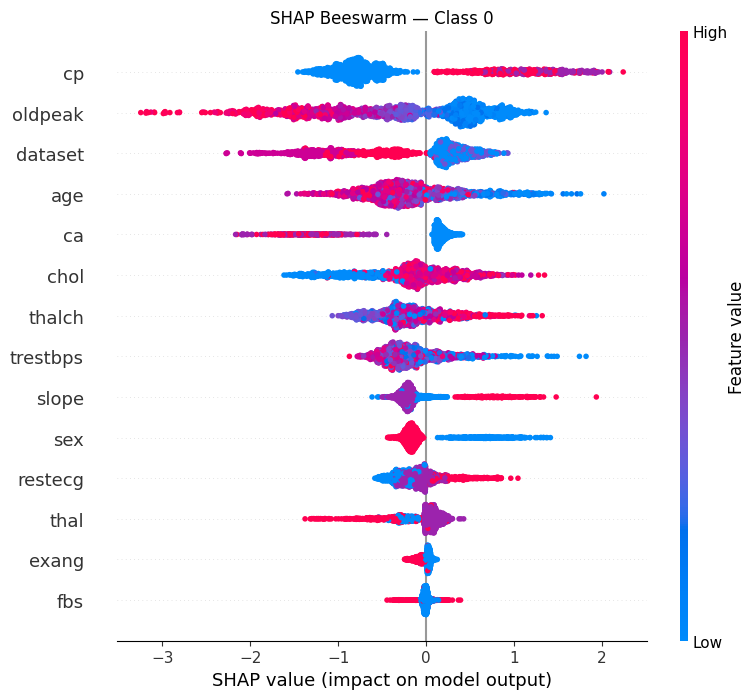


=== SHAP for Class 1 ===


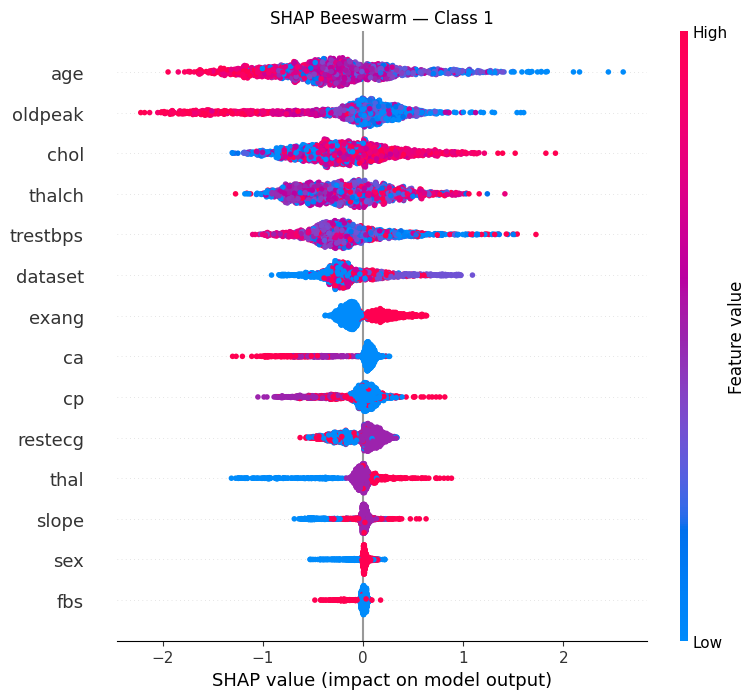


=== SHAP for Class 2 ===


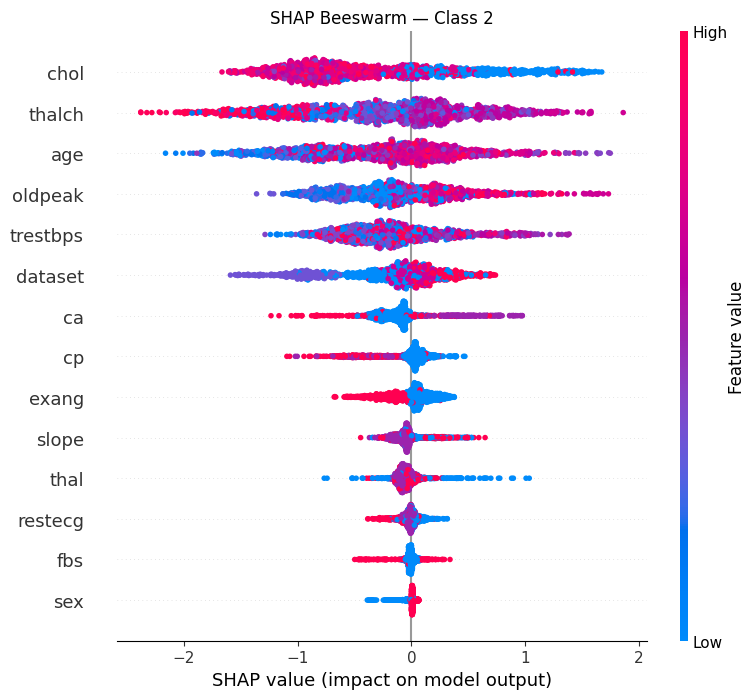


=== SHAP for Class 3 ===


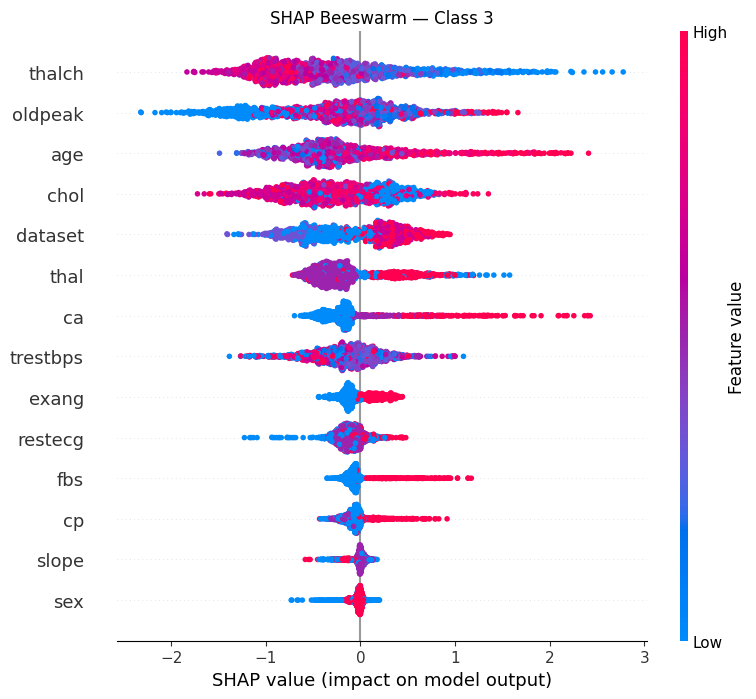


=== SHAP for Class 4 ===


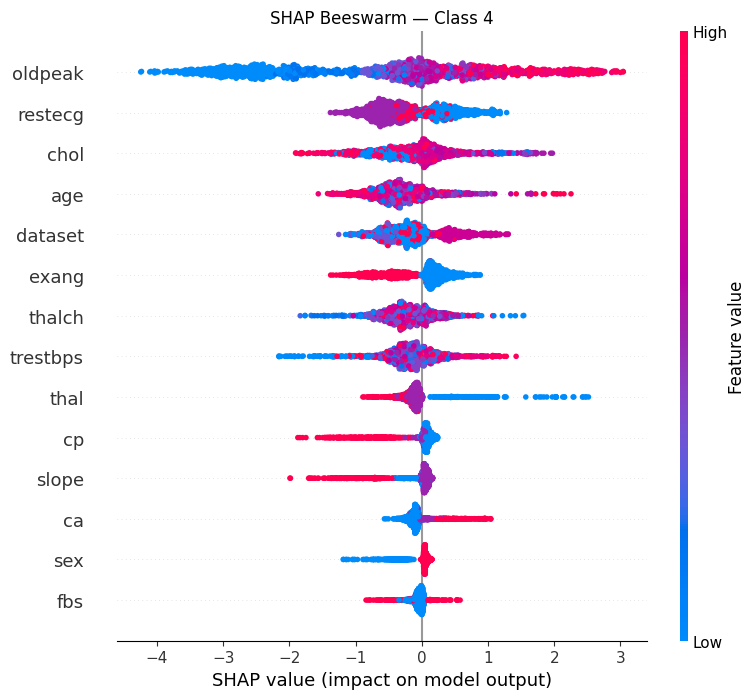

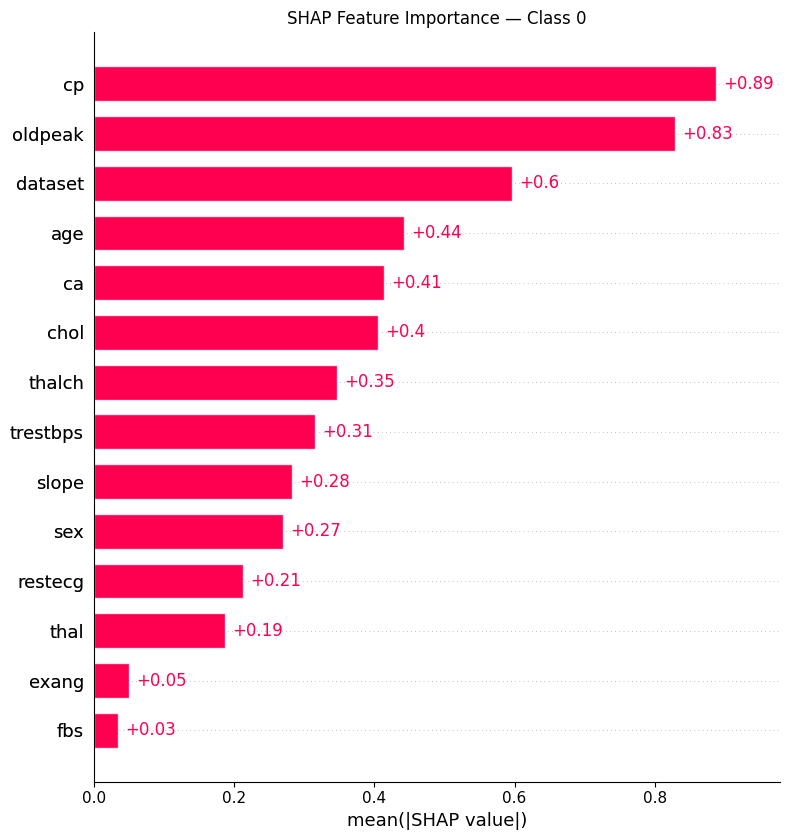

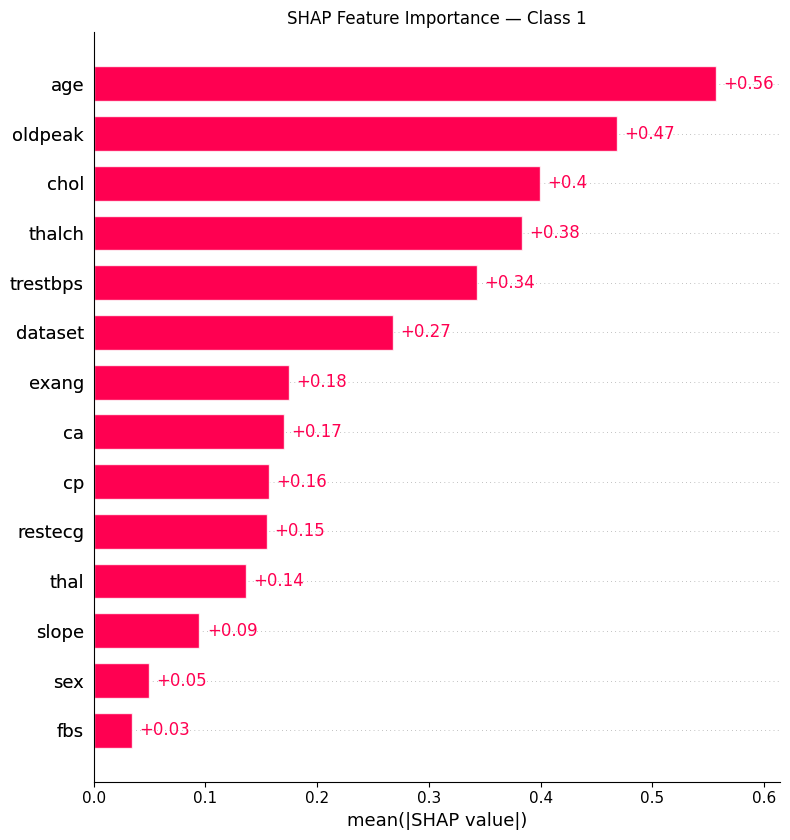

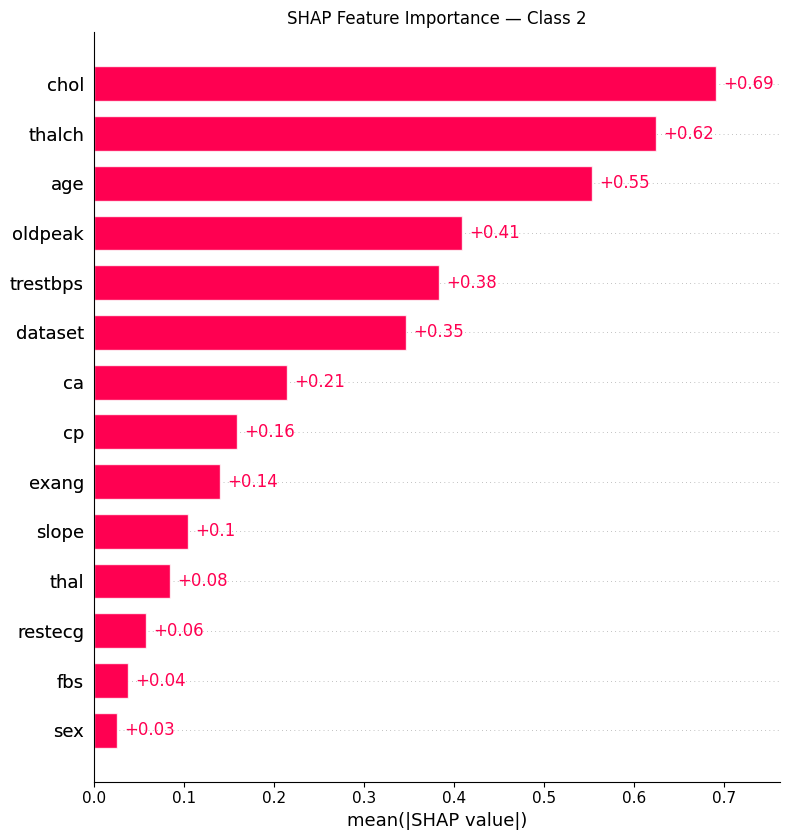

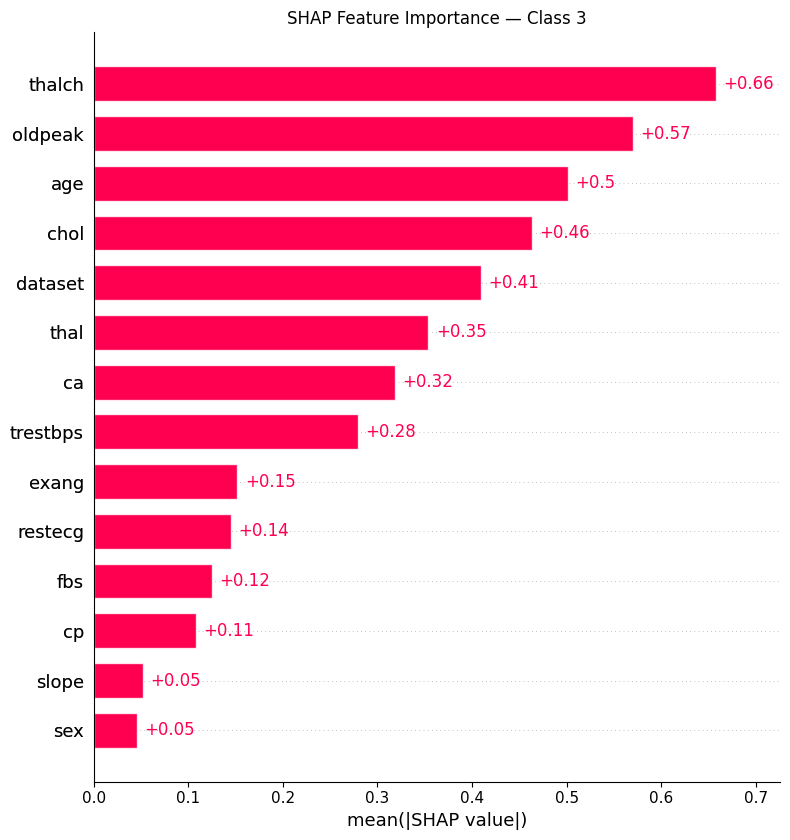

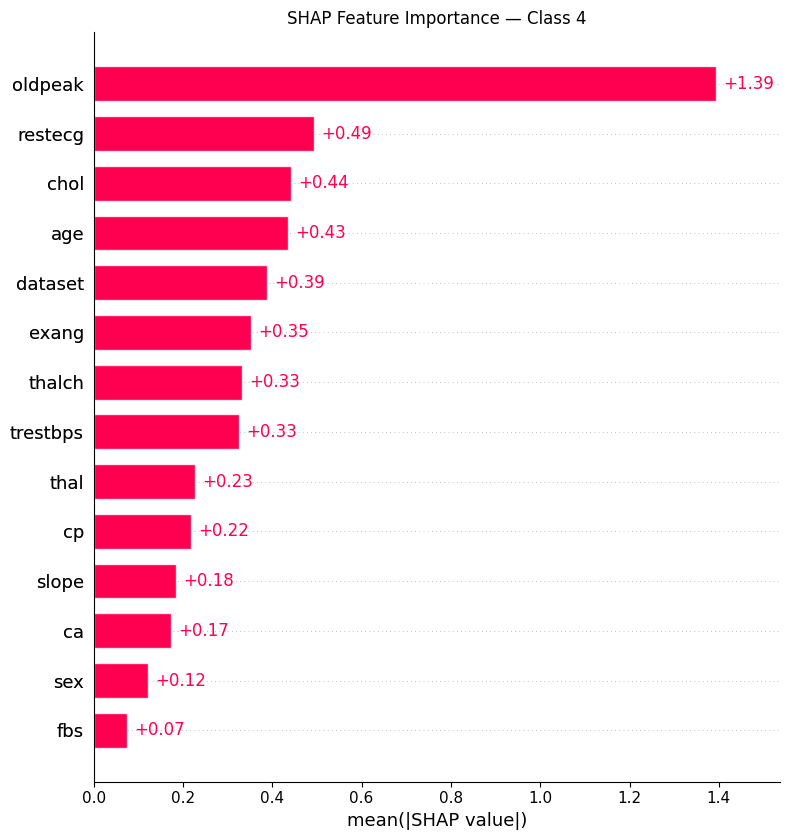

In [26]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Ensure we have the tuned model and the same features used in training
# best_xgb, X_train_smote, X_test, y_test assumed defined from earlier steps

# Rebuild explainer explicitly as TreeExplainer for multiclass XGBoost
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer(X_train_smote)  # 3D: [n_samples, n_features, n_classes]

feature_names = list(X_train_smote.columns)
class_labels = sorted(np.unique(y_train_smote))  # [0,1,2,3,4]

# --- Beeswarm per class ---
for i, cls in enumerate(class_labels):
    print(f"\n=== SHAP for Class {cls} ===")
    shap.plots.beeswarm(shap_values[..., i], max_display=15, show=False)
    plt.title(f"SHAP Beeswarm — Class {cls}")
    plt.tight_layout()
    plt.show()

# --- Bar plot per class (global importance for that class) ---
for i, cls in enumerate(class_labels):
    shap.plots.bar(shap_values[..., i], show=False, max_display=15)
    plt.title(f"SHAP Feature Importance — Class {cls}")
    plt.tight_layout()
    plt.show()


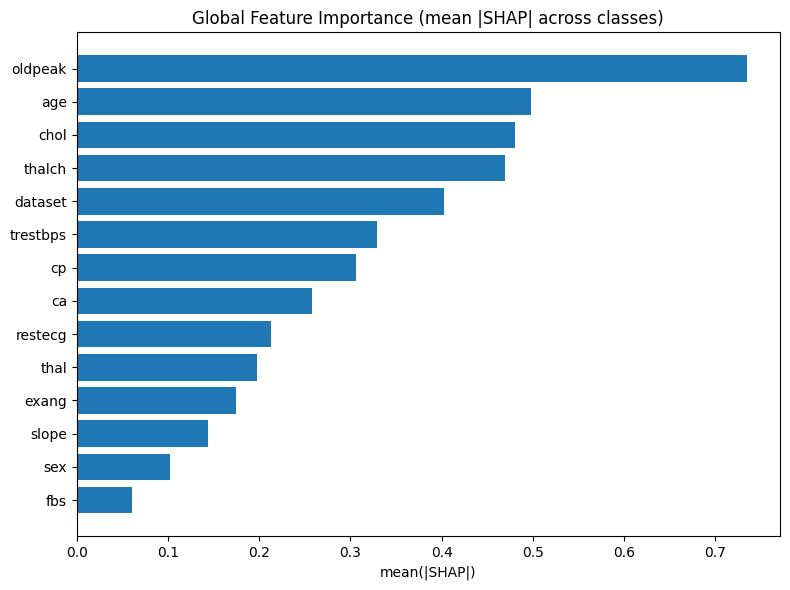

In [27]:
# Compute mean(|SHAP|) over samples, then average across classes
vals = np.abs(shap_values.values)                     # shape: (n_samples, n_features, n_classes)
mean_abs_per_feat_per_class = vals.mean(axis=0)       # (n_features, n_classes)
global_importance = mean_abs_per_feat_per_class.mean(axis=1)  # (n_features,)

# Top features
idx = np.argsort(global_importance)[::-1][:15]
top_feats = np.array(feature_names)[idx]
top_vals = global_importance[idx]

plt.figure(figsize=(8,6))
plt.barh(top_feats[::-1], top_vals[::-1])
plt.title("Global Feature Importance (mean |SHAP| across classes)")
plt.xlabel("mean(|SHAP|)")
plt.tight_layout()
plt.show()


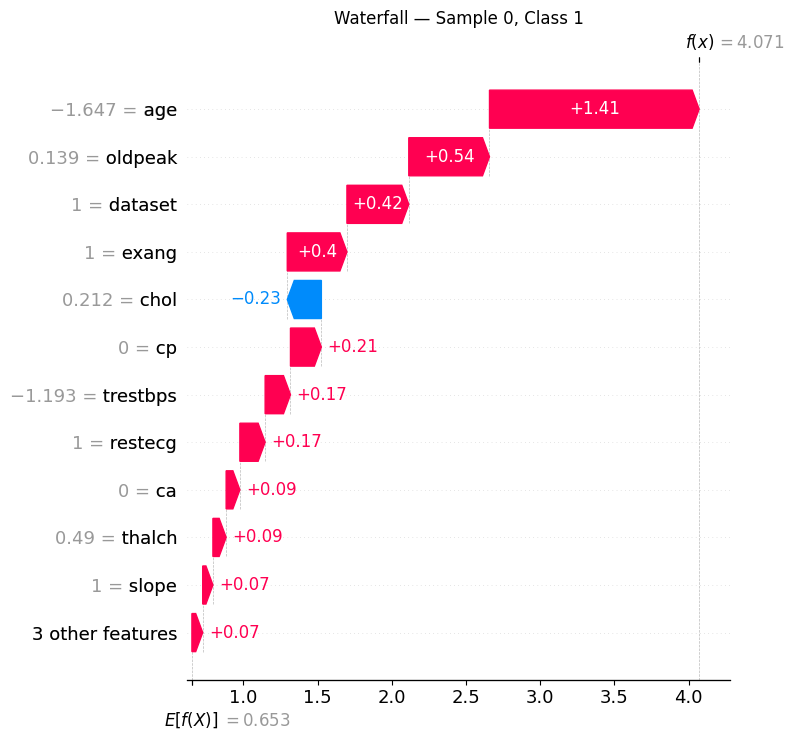

In [28]:
# Explain one instance from the test set (or train) for a chosen class
instance_idx = 0   # change as you like
focus_class = 1    # e.g., class 1

# Use the same background/features used in the explainer
shap_test = explainer(X_test)

shap.plots.waterfall(shap_test[instance_idx, :, focus_class], max_display=12, show=False)
plt.title(f"Waterfall — Sample {instance_idx}, Class {focus_class}")
plt.tight_layout()
plt.show()


## **Section 5 Conclusion: Model Interpretability with SHAP**

### 🎯 Objective  
While accuracy and F1-scores tell us *how well* our models perform, they don’t explain *why* predictions are made. **SHAP (SHapley Additive exPlanations)** offers a principled way to attribute each feature’s contribution to a given prediction.  
For our multiclass **XGBoost** model, SHAP helps us:  
- Understand **global feature importance** (which features matter most overall).  
- Inspect **class-specific importance** (which features drive predictions for a given class).  
- Provide **local explanations** for individual predictions (useful in high-stakes decisions).  

---

### 📦 Methodology  
We applied SHAP to our **best tuned XGBoost model** trained on the SMOTE-balanced dataset.  
1. **Explainer Type:** Used `shap.TreeExplainer` for compatibility with tree-based models like XGBoost.  
2. **Scope:** Generated SHAP values for all samples in the training set to understand global patterns.  
3. **Multiclass Handling:**  
   - SHAP returns a 3D array → `(n_samples, n_features, n_classes)`  
   - Visualized **per-class beeswarm plots** to capture differences in feature influence for each target class.  
   - Aggregated **mean(|SHAP|)** across all classes for a unified global ranking.  
4. **Visualizations Generated:**  
   - Beeswarm plots (per-class)  
   - Bar charts (per-class feature importance)  
   - Aggregated global importance bar chart  
   - Local explanation waterfall plot for a single prediction  

---

### 🖼️ Key Visuals  

**1️⃣ Per-Class Beeswarm Plots**  
- Show how feature values influence predictions **within a specific class**.  
- Example: In **Class 0 (No Disease)**, *age*, *thalach* (max heart rate), and *chol* (cholesterol) had strong negative SHAP values, indicating higher values in these features tend to push predictions away from Class 0.  

**2️⃣ Per-Class Bar Charts**  
- Summarize the *average absolute SHAP values* per feature for a given class.  
- Example: For **Class 4 (Severe Disease)**, features like *oldpeak*, *ca* (number of major vessels), and *thal* dominate the importance ranking.  

**3️⃣ Aggregated Global Importance**  
- Averaged SHAP values across all classes to produce a **unified importance ranking**.  
- **Top 5 most influential features overall:**  
  1. **oldpeak**  
  2. **ca** (number of major vessels)  
  3. **thalach** (max heart rate)  
  4. **age**  
  5. **chol**  

**4️⃣ Local Waterfall Plot (Single Prediction)**  
- Displays how each feature pushed the model’s prediction away from the base value towards a specific class.  
- Example: In one misclassified case, *low thalach* and *high oldpeak* were the strongest contributors to predicting disease severity.  

---

### 🧠 Insights from SHAP Analysis  

1. **Clinical Relevance:**  
   Features identified as important align well with known cardiovascular risk indicators (*chol*, *age*, *thalach*, *oldpeak*), giving confidence in the model’s reasoning.  

2. **Class-Specific Drivers:**  
   - Mild disease classes (1, 2) were influenced more by exercise-related measures like *thalach* and *exang* (exercise-induced angina).  
   - Severe disease (Class 4) was dominated by *oldpeak* and vessel count (*ca*).  

3. **Balanced Interpretability:**  
   SHAP allows us to explain both **correct** and **incorrect** predictions, which is critical for model trust in healthcare contexts.  

---

### 📌 Conclusion & Next Steps  

SHAP analysis enriched our model evaluation by uncovering **why** predictions were made:  
- Confirmed alignment between **domain knowledge** and **model logic**.  
- Highlighted **key features per class**, which could guide **feature engineering** or **data collection** priorities.  
- Opens the door to **trustworthy deployment**, as clinicians can see the “reasoning” behind each prediction.

**Next Steps:**  
- Incorporate SHAP explanations into the **final report and dashboard** for interactive model exploration.  
- Explore **class-conditional feature engineering** to boost precision in underperforming classes (e.g., Class 4).  
- Consider **SHAP-based feature selection** to simplify the model without sacrificing accuracy.  


## **6. Key Insights & Business/Domain Interpretation**

### **Overall Model Behaviour**
- **XGBoost (Tuned)** achieved ~81% accuracy on the SMOTE-augmented training set but dropped to ~56% on the original test set, suggesting overfitting despite class balancing.
- **Random Forest (Tuned)** delivered slightly better test accuracy (~58%) than XGBoost, maintaining robustness across most classes but struggling with minority classes.
- **Stacking Ensemble** offered marginal improvement in balanced accuracy over base learners but did not yield a breakthrough — likely due to similar weaknesses across base models.
- **Logistic Regression** showed lower overall accuracy but remained the most interpretable, making it a valuable baseline.

### **Class-specific Observations**
- **Class 0 (No Heart Disease)**: Consistently high recall (~80–92%) across models — healthy patients are well-identified.
- **Class 4 (Severe Disease)**: Persistent challenge — near-zero recall before SMOTE and minimal improvement after balancing due to extreme underrepresentation.
- **Intermediate Classes (1, 2, 3)**: Frequently confused with one another, suggesting overlapping feature patterns and potential label ambiguity.

### **Feature Insights from SHAP**
- **thal** (Thallium stress test result), **ca** (Number of major vessels), and **cp** (Chest pain type) emerged as top predictive features.
- **oldpeak** (ST depression) and **thalach** (Maximum heart rate) also significantly influenced predictions, aligning with known clinical indicators.
- **Age** showed a non-linear effect — more relevant in differentiating moderate vs. severe disease rather than healthy vs. diseased cases.

### **Practical Implications**
- For clinical decision support, tuned Random Forest or XGBoost can be used to **flag high-risk patients**, while Logistic Regression can serve as a **transparent verification tool** for clinicians.
- Prediction uncertainty in Classes 1–3 should trigger **further diagnostic testing** rather than immediate classification.

---

## **7. Limitations & Next Steps**

### **Limitations**
1. **Class Imbalance**  
   - Even with SMOTE, synthetic samples may not fully capture real-world patient diversity, especially for Class 4.
2. **Overfitting Risk**  
   - Notable drop in accuracy from training to test data indicates models may memorise patterns from resampled data.
3. **Feature Engineering Scope**  
   - Current preprocessing uses basic scaling and encoding; advanced clinical feature derivation may improve results.
4. **Dataset Specificity**  
   - UCI Heart Disease dataset may not generalise across demographics or different healthcare settings.
5. **Interpretability Gap for Ensembles**  
   - SHAP helps explain tree models but may miss subtle feature interactions in stacked models.

### **Next Steps**
- **Data Enhancement**: Acquire more real-world Class 4 cases to reduce synthetic bias from SMOTE.
- **Model Exploration**: Test CatBoost, LightGBM, or monotonic gradient boosting to better handle categorical and clinical data.
- **Probability Calibration**: Apply Platt scaling or isotonic regression to ensure predicted probabilities align with real-world risk.
- **Threshold Optimisation per Class**: Adjust decision thresholds individually to boost recall for critical classes.
- **Real-world Deployment**: Pilot the model in a live clinical workflow and measure performance prospectively.



## 1️⃣ Model Performance Comparison Table

| Model                     | Accuracy | Macro Avg Precision | Macro Avg Recall | Macro Avg F1 | Weighted Avg Precision | Weighted Avg Recall | Weighted Avg F1 |
|---------------------------|----------|---------------------|------------------|--------------|------------------------|---------------------|-----------------|
| Logistic Regression       | 0.560    | 0.37                | 0.35             | 0.35         | 0.51                   | 0.56                | 0.52            |
| Random Forest (Tuned)     | 0.582    | 0.38                | 0.39             | 0.38         | 0.60                   | 0.58                | 0.59            |
| XGBoost (Tuned)           | 0.560    | 0.40                | 0.41             | 0.40         | 0.59                   | 0.56                | 0.57            |
| Ensemble Stacking         | 0.587    | 0.40                | 0.39             | 0.39         | 0.59                   | 0.59                | 0.59            |

> **Observation:**  
> - XGBoost and Stacking achieved similar accuracies (~0.56–0.59) but improved some minority class predictions.  
> - Logistic Regression lags in multi-class recall.  
> - Random Forest shows slightly better weighted F1, making it more balanced for majority classes.  



## 2️⃣ Executive Summary (Non-Technical)

Heart disease remains one of the leading causes of death worldwide, and early detection is critical to improving patient outcomes.  
This project aimed to **predict the presence and severity of heart disease** using a dataset from the UCI Machine Learning Repository. The analysis followed a structured data science process — from **data cleaning and exploration** to **model development, hyperparameter tuning, and interpretability**.

Four machine learning approaches were tested:
- **Logistic Regression**
- **Random Forest**
- **XGBoost**
- **Ensemble Stacking**

**Key Findings:**
- Accuracy ranged from **56% to 59%** across models, with Random Forest and Stacking performing slightly better.
- Class imbalance (especially for severe heart disease cases) significantly affected recall for minority classes.
- SHAP analysis revealed that **age, chest pain type, and maximum heart rate** were among the most important predictors.
- Balancing data with SMOTE helped improve fairness across classes, but gains were limited without more representative data.

**Recommendation:**  
Use Random Forest or Stacking as the baseline predictive model, integrate with hospital screening workflows, and retrain periodically with new patient data for better minority class predictions.



## 3️⃣ Model Workflow Diagram (Text-based)




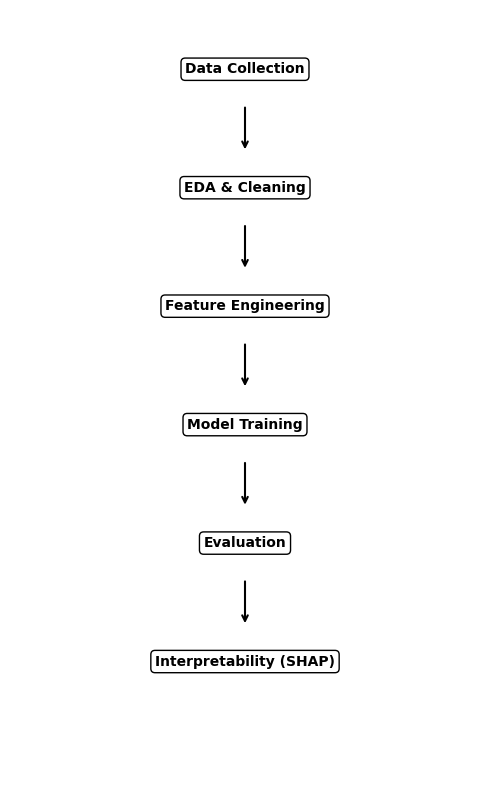

In [36]:
import matplotlib.pyplot as plt

# Steps in the workflow
steps = [
    "Data Collection",
    "EDA & Cleaning",
    "Feature Engineering",
    "Model Training",
    "Evaluation",
    "Interpretability (SHAP)"
]

# Create figure
fig, ax = plt.subplots(figsize=(5, 8))
ax.axis("off")

# Coordinates for vertical layout
y_positions = list(range(len(steps)*2, 0, -2))  # spacing for arrows

# Draw the steps as boxes
for i, step in enumerate(steps):
    ax.text(0, y_positions[i], step, ha="center", va="center",
            fontsize=10, fontweight="bold",
            bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"))

# Draw connecting arrows top → down
for i in range(len(steps) - 1):
    ax.annotate("",
                xy=(0, y_positions[i+1] + 0.6),   # arrow head at next box top
                xytext=(0, y_positions[i] - 0.6), # arrow tail at current box bottom
                arrowprops=dict(arrowstyle="->", color="black", lw=1.5))

# Adjust limits for proper spacing
ax.set_xlim(-2, 2)
ax.set_ylim(0, max(y_positions) + 1)

plt.tight_layout()
plt.savefig("/content/vertical_pipeline_with_down_arrows.png", dpi=200, bbox_inches="tight")
plt.show()
